Hiring Task - ML


In [ ]:
## Task

#Our (hypothetical) marketing department needs some help in focussing on the most important market segment. Instead of marketing to everyone, they need our help in identifying who our most profitable customers are. Are they married or unmarried, working or retired, premium or budget buyers etc… This will help them position things better.

#Also, they need help in identifying the bestselling products. 

#So, given the transaction data, help us identify the top 3 most profitable products and characteristics of our most loyal customers.  Also include your hypothesis of why you think the loyal customers like

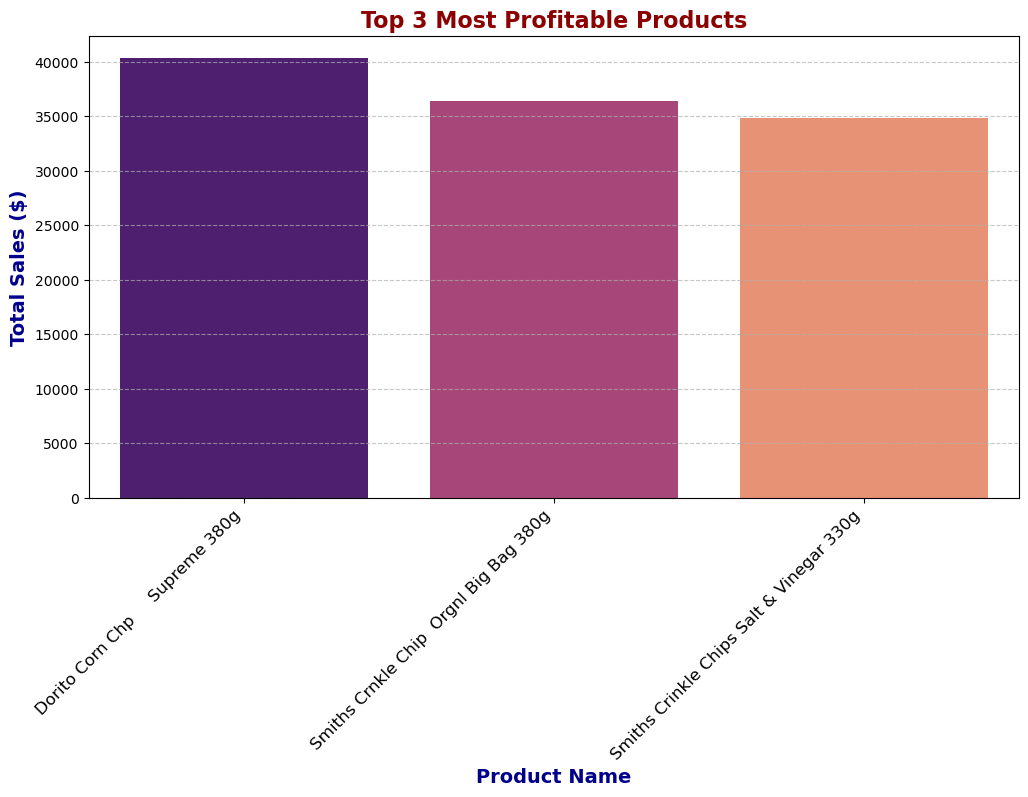

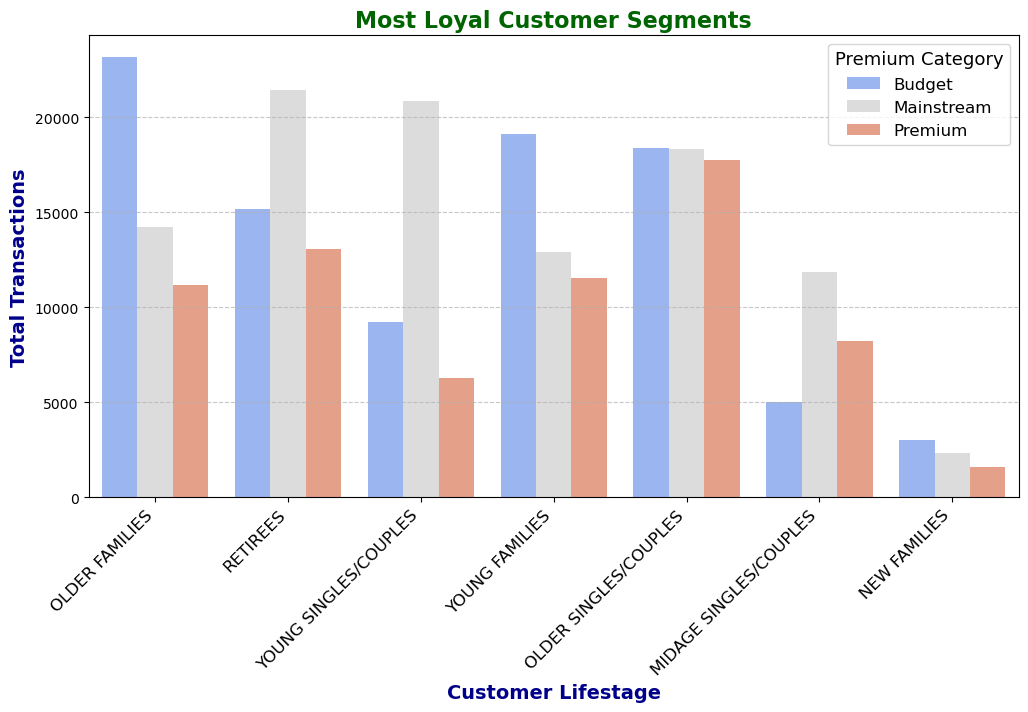


=== Top 3 Most Profitable Products ===
╒════╤══════════════════════════════════════════╤═════════════╕
│    │ PROD_NAME                                │ TOT_SALES   │
╞════╪══════════════════════════════════════════╪═════════════╡
│ 11 │ Dorito Corn Chp     Supreme 380g         │ $40,352.00  │
├────┼──────────────────────────────────────────┼─────────────┤
│ 86 │ Smiths Crnkle Chip  Orgnl Big Bag 380g   │ $36,367.60  │
├────┼──────────────────────────────────────────┼─────────────┤
│ 77 │ Smiths Crinkle Chips Salt & Vinegar 330g │ $34,804.20  │
╘════╧══════════════════════════════════════════╧═════════════╛

=== Most Loyal Customer Segment ===
╒════╤════════════════╤════════════════════╤══════════╕
│    │ LIFESTAGE      │ PREMIUM_CUSTOMER   │   TXN_ID │
╞════╪════════════════╪════════════════════╪══════════╡
│  6 │ OLDER FAMILIES │ Budget             │    23160 │
╘════╧════════════════╧════════════════════╧══════════╛

=== Customer Segmentation Analysis ===
╒════╤═════════════════════

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import matplotlib as mpl

# Set font to support wider character sets
mpl.rcParams['font.family'] = 'DejaVu Sans'

# Load the datasets
purchase_behaviour = pd.read_csv(r"D:\Downloads\purchase_behaviour.csv")
transaction_data = pd.read_csv(r"D:\Downloads\transaction_data.csv")

# Merge datasets
merged_df = transaction_data.merge(purchase_behaviour, on="LYLTY_CARD_NBR", how="left")

# Top 3 most profitable products
top_products = (
    merged_df.groupby(["PROD_NAME"])["TOT_SALES"]
    .sum()
    .reset_index()
    .sort_values(by="TOT_SALES", ascending=False)
    .head(3)
)

# Format sales values with currency
top_products["TOT_SALES"] = top_products["TOT_SALES"].apply(lambda x: f"${x:,.2f}")

# Most loyal customer segment
loyal_customers = (
    merged_df.groupby(["LYLTY_CARD_NBR", "LIFESTAGE", "PREMIUM_CUSTOMER"])
    .agg({"TXN_ID": "count", "TOT_SALES": "sum"})
    .reset_index()
    .sort_values(by="TXN_ID", ascending=False)
)

loyal_customer_segment = (
    loyal_customers.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"]) ["TXN_ID"]
    .sum()
    .reset_index()
    .sort_values(by="TXN_ID", ascending=False)
    .head(1)
)

# Customer segmentation analysis
customer_segments = (
    loyal_customers.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])
    .agg({"TXN_ID": "sum", "TOT_SALES": "sum"})
    .reset_index()
    .sort_values(by="TXN_ID", ascending=False)
)

# Format sales values with currency
customer_segments["TOT_SALES"] = customer_segments["TOT_SALES"].apply(lambda x: f"${x:,.2f}")

# Detailed visualization of top products
plt.figure(figsize=(12,6))
sns.barplot(x=top_products["PROD_NAME"], y=top_products["TOT_SALES"].str.replace("$", "").str.replace(",", "").astype(float), palette="magma")
plt.title("Top 3 Most Profitable Products", fontsize=16, fontweight='bold', color='darkred')
plt.xlabel("Product Name", fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel("Total Sales ($)", fontsize=14, fontweight='bold', color='darkblue')
plt.xticks(rotation=45, ha='right', fontsize=12, color='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(x=customer_segments["LIFESTAGE"], y=customer_segments["TXN_ID"], hue=customer_segments["PREMIUM_CUSTOMER"], palette="coolwarm")
plt.title("Most Loyal Customer Segments", fontsize=16, fontweight='bold', color='darkgreen')
plt.xlabel("Customer Lifestage", fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel("Total Transactions", fontsize=14, fontweight='bold', color='darkblue')
plt.xticks(rotation=45, ha='right', fontsize=12, color='black')
plt.legend(title="Premium Category", fontsize=12, title_fontsize='13')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Summary report with enhanced formatting
print("\n=== Top 3 Most Profitable Products ===")
print(tabulate(top_products, headers='keys', tablefmt='fancy_grid'))

print("\n=== Most Loyal Customer Segment ===")
print(tabulate(loyal_customer_segment, headers='keys', tablefmt='fancy_grid'))

print("\n=== Customer Segmentation Analysis ===")
print(tabulate(customer_segments, headers='keys', tablefmt='fancy_grid'))

# Hypothesis on Loyal Customers
print("\nHypothesis: The most loyal customers are 'Older Families' in the Budget segment. These customers likely purchase in bulk due to household needs, preferring cost-effective options over premium products.")
